# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=fd1ae2fbb5a5d284ef531507b1daffbe"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=fd1ae2fbb5a5d284ef531507b1daffbe&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coahuayana de hidalgo
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | diyarbakir
Processing Record 7 of Set 1 | linxia chengguanzhen
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | bandon
Processing Record 10 of Set 1 | turkeli
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | happy valley-goose bay
Processing Record 14 of Set 1 | talara
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | vilyuchinsk
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | krutinka
Processing Record 21 of Set 1 | port-aux-francais
Process

Processing Record 34 of Set 4 | sao felix do xingu
Processing Record 35 of Set 4 | tondon
Processing Record 36 of Set 4 | enewetak
Processing Record 37 of Set 4 | dryden
Processing Record 38 of Set 4 | sabang
Processing Record 39 of Set 4 | severobaykal'sk
Processing Record 40 of Set 4 | manokwari
Processing Record 41 of Set 4 | lengshuitan
Processing Record 42 of Set 4 | francisco sa
Processing Record 43 of Set 4 | sarny
Processing Record 44 of Set 4 | mary
Processing Record 45 of Set 4 | bereeda
Processing Record 46 of Set 4 | college
Processing Record 47 of Set 4 | boende
Processing Record 48 of Set 4 | chibougamau
Processing Record 49 of Set 4 | mpika
Processing Record 0 of Set 5 | remire-montjoly
Processing Record 1 of Set 5 | toamasina
Processing Record 2 of Set 5 | linxi
Processing Record 3 of Set 5 | mae chai
Processing Record 4 of Set 5 | margaret river
Processing Record 5 of Set 5 | ta`u
Processing Record 6 of Set 5 | kulia village
City not found. Skipping...
Processing Recor

Processing Record 29 of Set 8 | rio grande
Processing Record 30 of Set 8 | uturoa
Processing Record 31 of Set 8 | villa dolores
Processing Record 32 of Set 8 | dimbokro
Processing Record 33 of Set 8 | rincon
Processing Record 34 of Set 8 | mogadishu
Processing Record 35 of Set 8 | mwinilunga
Processing Record 36 of Set 8 | mirnyy
Processing Record 37 of Set 8 | gidam
Processing Record 38 of Set 8 | cao bang
Processing Record 39 of Set 8 | nabire
Processing Record 40 of Set 8 | manismata
Processing Record 41 of Set 8 | touros
Processing Record 42 of Set 8 | yelizovo
Processing Record 43 of Set 8 | troitsko-pechorsk
Processing Record 44 of Set 8 | havana
Processing Record 45 of Set 8 | san jose del cabo
Processing Record 46 of Set 8 | santiago de cao
Processing Record 47 of Set 8 | wailua homesteads
Processing Record 48 of Set 8 | san julian
Processing Record 49 of Set 8 | ivrindi
Processing Record 0 of Set 9 | north tamworth
Processing Record 1 of Set 9 | thunder bay
Processing Record 2

Processing Record 19 of Set 12 | trinity beach
Processing Record 20 of Set 12 | tenosique
Processing Record 21 of Set 12 | urangan
Processing Record 22 of Set 12 | hihifo
City not found. Skipping...
Processing Record 23 of Set 12 | kamennomostskoye
Processing Record 24 of Set 12 | pirallahi
Processing Record 25 of Set 12 | mantua
Processing Record 26 of Set 12 | al khawr
Processing Record 27 of Set 12 | moses lake
Processing Record 28 of Set 12 | orchard homes
Processing Record 29 of Set 12 | puerto armuelles
Processing Record 30 of Set 12 | verkhnevilyuysk
Processing Record 31 of Set 12 | dunedin
Processing Record 32 of Set 12 | hemsby
Processing Record 33 of Set 12 | arish
Processing Record 34 of Set 12 | aras-asan
Processing Record 35 of Set 12 | almeirim
Processing Record 36 of Set 12 | kudymkar
Processing Record 37 of Set 12 | sangolqui
Processing Record 38 of Set 12 | oruro
Processing Record 39 of Set 12 | saldanha
Processing Record 40 of Set 12 | mariehamn
Processing Record 41 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coahuayana de hidalgo,18.7000,-103.6583,27.62,82,71,1.62,MX,1697381475
1,longyearbyen,78.2186,15.6401,-0.09,74,75,11.32,SJ,1697381476
2,karratha,-20.7377,116.8463,27.75,65,12,2.67,AU,1697381476
3,keflavik,64.0049,-22.5624,8.95,93,75,6.69,IS,1697381476
4,iqaluit,63.7506,-68.5145,-0.15,86,100,3.60,CA,1697381477


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coahuayana de hidalgo,18.7000,-103.6583,27.62,82,71,1.62,MX,1697381475
1,longyearbyen,78.2186,15.6401,-0.09,74,75,11.32,SJ,1697381476
2,karratha,-20.7377,116.8463,27.75,65,12,2.67,AU,1697381476
3,keflavik,64.0049,-22.5624,8.95,93,75,6.69,IS,1697381476
4,iqaluit,63.7506,-68.5145,-0.15,86,100,3.60,CA,1697381477


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

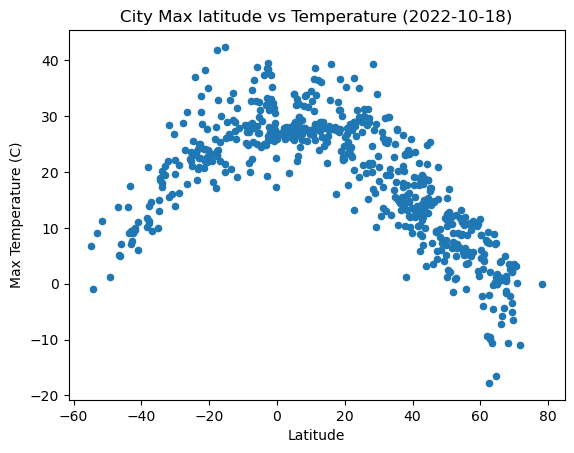

In [8]:
# Build scatter plot for latitude vs. temperature
lat_and_temp_plot= city_data_df.plot.scatter("Lat", "Max Temp")

# Incorporate the other graph properties
lat_and_temp_plot.set_xlabel("Latitude")
lat_and_temp_plot.set_ylabel("Max Temperature (C)")
lat_and_temp_plot.set_title("City Max latitude vs Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

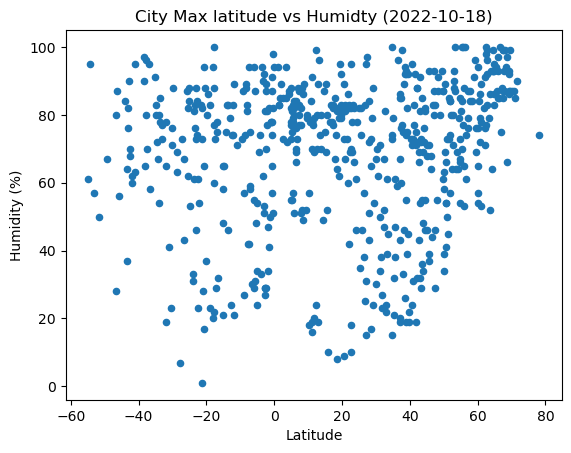

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_and_hum_plot= city_data_df.plot.scatter("Lat", "Humidity")

# Incorporate the other graph properties
lat_and_hum_plot.set_xlabel("Latitude")
lat_and_hum_plot.set_ylabel("Humidity (%)")
lat_and_hum_plot.set_title("City Max latitude vs Humidty (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

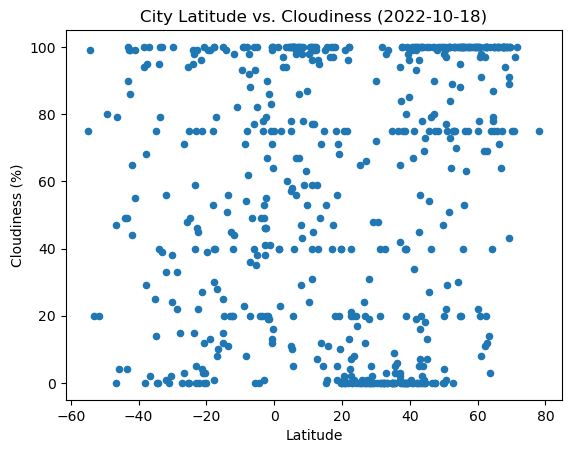

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_and_cloud_plot= city_data_df.plot.scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
lat_and_cloud_plot.set_xlabel("Latitude")
lat_and_cloud_plot.set_ylabel("Cloudiness (%)")
lat_and_cloud_plot.set_title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

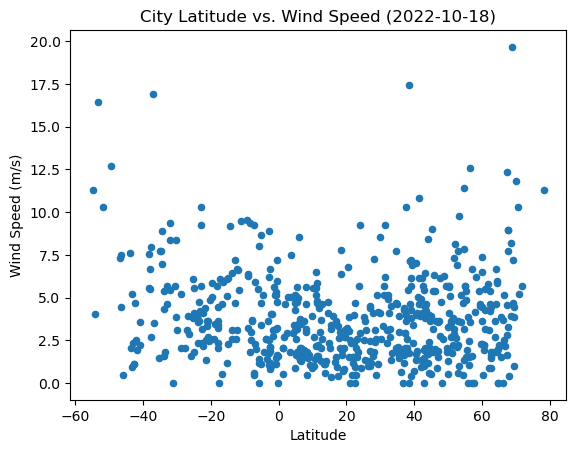

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_and_wind_plot= city_data_df.plot.scatter("Lat", "Wind Speed")

# Incorporate the other graph properties
lat_and_wind_plot.set_xlabel("Latitude")
lat_and_wind_plot.set_ylabel("Wind Speed (m/s)")
lat_and_wind_plot.set_title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linregress(x, y):
    res = linregress(x, y)
    plt.scatter(x, y)
    plt.plot(x, res.intercept + res.slope*x, 'r')
    plot_text="y={:.2f}x + {:.2f}".format(res.slope, res.intercept)
    plt.text(max(x), min(y), plot_text, c='r', ha='right')
    print("The r-value is: {}".format(res.rvalue))
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,coahuayana de hidalgo,18.7000,-103.6583,27.62,82,71,1.62,MX,1697381475
1,longyearbyen,78.2186,15.6401,-0.09,74,75,11.32,SJ,1697381476
3,keflavik,64.0049,-22.5624,8.95,93,75,6.69,IS,1697381476
4,iqaluit,63.7506,-68.5145,-0.15,86,100,3.60,CA,1697381477
5,diyarbakir,37.9158,40.2189,22.99,33,75,2.57,TR,1697381477


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,karratha,-20.7377,116.8463,27.75,65,12,2.67,AU,1697381476
10,atafu village,-8.5421,-172.5159,28.38,74,71,9.39,TK,1697381479
13,talara,-4.5772,-81.2719,24.42,69,0,5.14,PE,1697381480
14,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1697381480
16,blackmans bay,-43.0167,147.3167,7.07,82,90,2.36,AU,1697381481


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8763518446895562


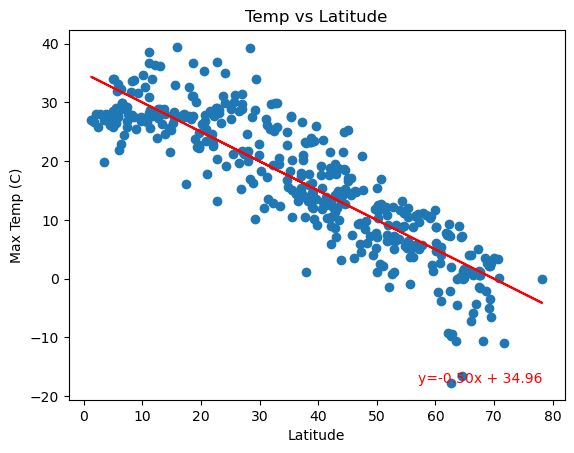

In [15]:
# Linear regression on Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Temp vs Latitude")
plt.show()

The r-value is: 0.7780003801131948


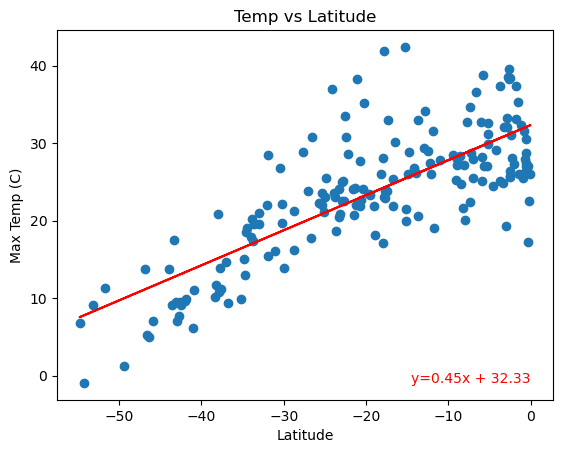

In [16]:
# Linear regression on Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Temp vs Latitude")
plt.show()

**Discussion about the linear relationship:** Qualitatively it appears there is a strong positive correlation in the Southern Hemisphere as the r value is above 0.7. For the Northern hemisphere, the correlation is almost the same but inversed with a -0.8 r value. We can conclude, as you get closer to the equator, the temperature rises as expected

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17225792556092495


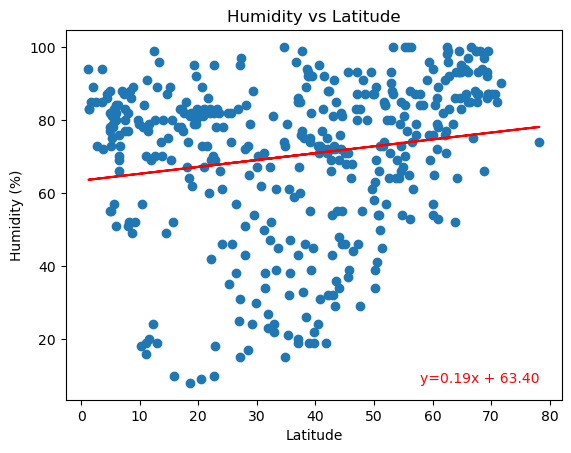

In [17]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude")
plt.show()

The r-value is: -0.0899164488007059


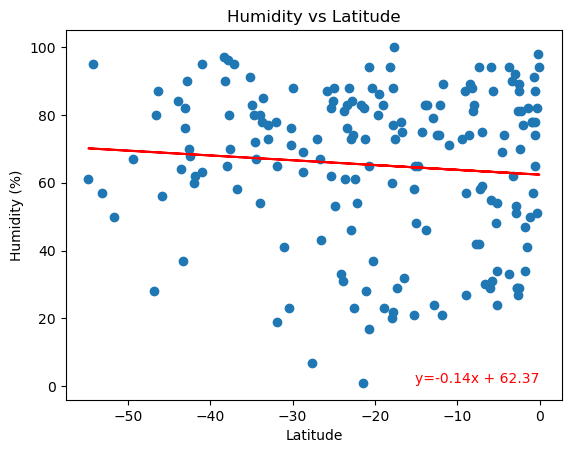

In [18]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude")
plt.show()

**Discussion about the linear relationship:** Based on the r values for both hemispheres, there is almost no correlation between latitudes and humidity since the r values are so close to 0. I would have assumed that the humidity would rise near the equator, but that is not the case based on these graphs.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18359230087949754


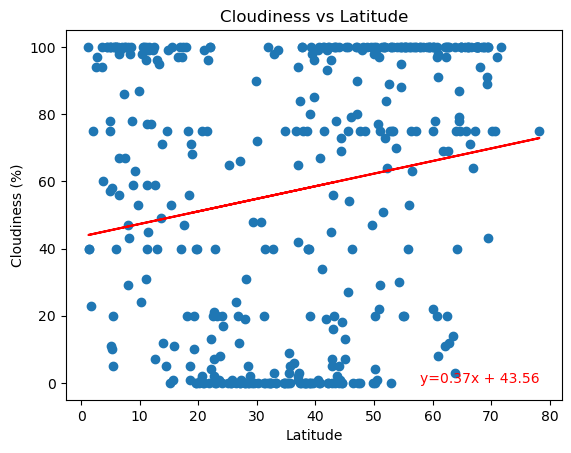

In [19]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude")
plt.show()

The r-value is: 0.02422824384788942


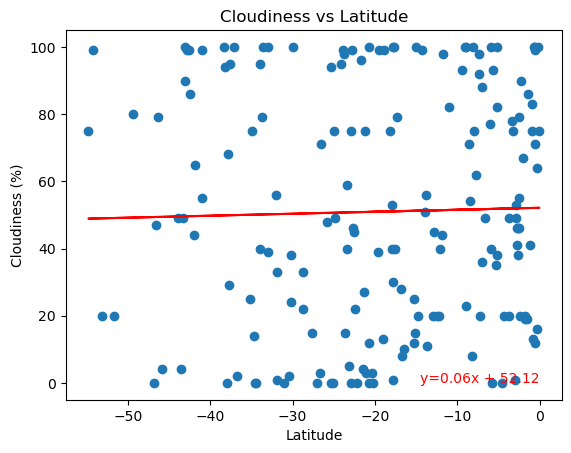

In [20]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude")
plt.show()

**Discussion about the linear relationship:** Similarly to humidity, the r values for cloudiness vs latitude are close to 0 showing almost no correlation. This is something I would have assumed--that latitude should not have an effect on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2088722408064095


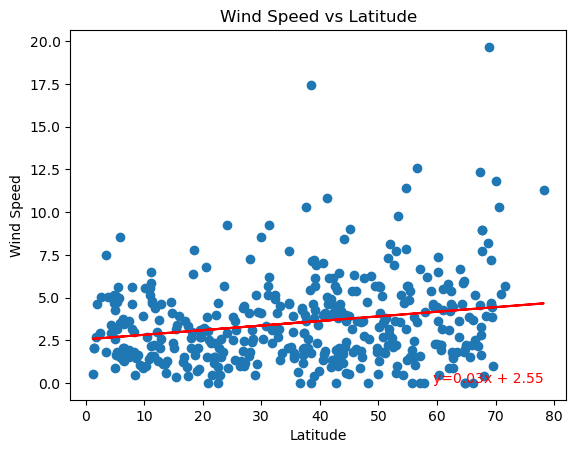

In [21]:
# Northern Hemisphere
plot_linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude")
plt.show()

The r-value is: -0.266732051766375


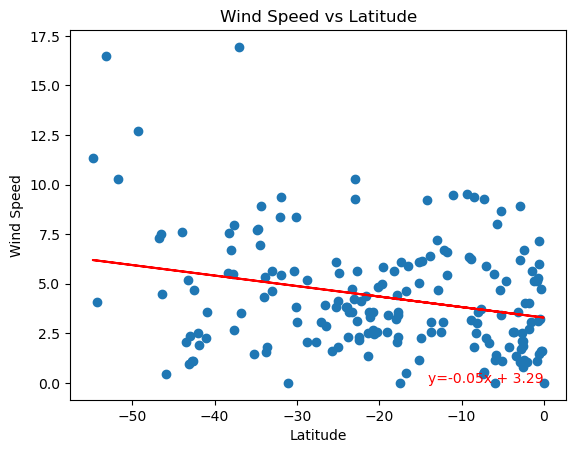

In [22]:
# Southern Hemisphere
plot_linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Latitude")
plt.show()

**Discussion about the linear relationship:** Based on the r values, there is a minor correlation between wind speed and latitudes- with both hemispheres being just over 0.2.